In [1]:
import requests
import json
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

In [2]:
from opencage.geocoder import OpenCageGeocode

def get_latlong(address):
    
    api_key = '3fe40ec792dc41e180275f912fee083f'
    geocoder = OpenCageGeocode(api_key)
    result = geocoder.geocode(address)
    
    if result:
        location = result[0]['geometry']
        return location['lat'], location['lng']
    else:
        return none,none

In [3]:
url = "https://api.foursquare.com/v3/places/search"
params = {
    "query": "bakeries",
    "near": "New York, NY",
    "limit": 50,
    "fields": "name,rating,location"
}
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3IDf6eRjF8sv9+n5YL4QExpYhaw/NOzU7LxSQTfM/s6I="
}

response = requests.get(url, params=params, headers=headers)
data = response.json()
data_list = []
for venue in data['results']:
    name = venue.get('name', 'N/A')
    rating = venue.get('rating', 'N/A')
    address = venue.get('location', {}).get('formatted_address', 'N/A')
    latitude, longitude = get_latlong(address)

    data_list.append({
        "Name": name,
        "Rating": rating,
        "Address": address,
        "Latitude": latitude if latitude is not None else 'Not found',
        "Longitude": longitude if longitude is not None else 'Not found'
    })
    
    if latitude and longitude:
        print(f"Name: {name}, Rating: {rating}, Address: {address}, Latitude: {latitude}, Longitude: {longitude}")
    else:
        print(f"Name: {name}, Rating: {rating}, Address: {address}, Latitude/Longitude not found")
print(data_list)

Name: Milk Bar NYC Flagship, Rating: 8.5, Address: 1196 Broadway, New York, NY 10001, Latitude: 40.7457991, Longitude: -73.9884597
Name: Bourke Street Bakery, Rating: 8.6, Address: 15 E 28th St (Madison Ave), New York, NY 10016, Latitude: 40.743389, Longitude: -73.986147
Name: Tompkins Square Bagels, Rating: 7.9, Address: 23 E 17th St, New York, NY 10003, Latitude: 40.7374794, Longitude: -73.9907375
Name: Bourke Street Bakery, Rating: 8.1, Address: 162 8th Ave, New York, NY 10011, Latitude: 40.7422667, Longitude: -74.0004531
Name: Keki Modern Cakes, Rating: 8.4, Address: 315 5th Ave (between E 32nd & E 33rd Sts), New York, NY 10016, Latitude: 40.744014, Longitude: -73.976059
Name: La Bergamote, Rating: 8.7, Address: 177 9th Ave (btwn W 20th & W 21st St), New York, NY 10011, Latitude: 40.742608, Longitude: -73.995371
Name: Empire Cake, Rating: 8.2, Address: 112 8th Ave (btwn 15th & 16th St), New York, NY 10011, Latitude: 40.738767, Longitude: -73.996174
Name: Leonelli Bakery, Rating: 7.

In [4]:
 from opencage.geocoder import OpenCageGeocode

 api_key = '3fe40ec792dc41e180275f912fee083f'
 geocoder = OpenCageGeocode(api_key)

 address = "691 9th Ave (Between 47th And 48th), New York, NY 10036"
 result = geocoder.geocode(address)

 location = result[0]['geometry']
 print((location['lat'], location['lng']))


(40.764915, -73.997486)


In [5]:
import pandas as pd
new_york_df = pd.DataFrame(data_list)

In [6]:
import folium

In [7]:

new_york_df_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, long, name, city in zip(new_york_df['Latitude'], new_york_df['Longitude'], new_york_df['Name'], new_york_df['Address']):
    label = '{},{}'.format(name, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, long],
        radius=6,
        popup=label,
        color='Blue',
        fill=True,
        fill_color='#90EE90',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(new_york_df_map)

new_york_df_map

In [9]:
pip install kmodes


Note: you may need to restart the kernel to use updated packages.


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 96.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 96.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 96.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 96.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 96.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 94.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 94.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

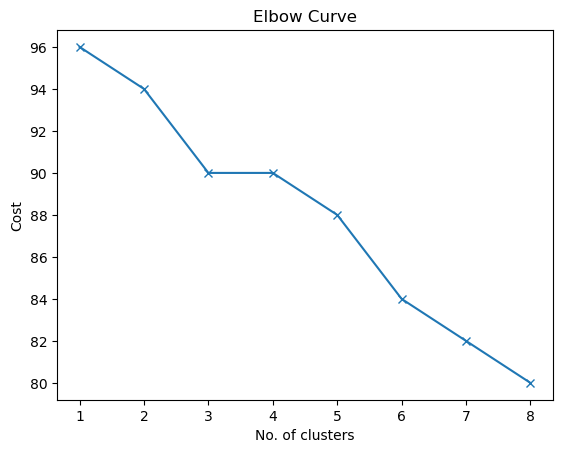

In [10]:
import numpy as np 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 

data_latlong = new_york_df[['Latitude', 'Longitude']]

# Elbow curve to find optimal K 
cost = [] 
K = range(1, 9) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1) 
    kmode.fit_predict(data_latlong) 
    cost.append(kmode.cost_) 

plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [ ]:
# As we can see from the graph there is an elbow-like shape at 5 and 6. Now we can consider either 5 or 6 cluster. 
# Let’s consider Number of cluster = 6

In [11]:
from sklearn.cluster import KMeans

# Assuming your DataFrame is named new_york_df with 'latitude' and 'longitude' columns
# Extract the relevant columns

kmeans = KMeans(n_clusters=6)
kmeans.fit(data_latlong)

cluster_assignments = kmeans.labels_
new_york_df['cluster'] = cluster_assignments

print("Cluster membership: \n{}".format(new_york_df['cluster']))

# Assuming cluster_assignments is a NumPy array
cluster_list = cluster_assignments.tolist()
print(cluster_list)

C:\Users\balas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster membership: 
0     1
1     1
2     0
3     0
4     3
5     0
6     0
7     1
8     0
9     0
10    4
11    0
12    1
13    4
14    1
15    1
16    1
17    0
18    3
19    1
20    4
21    4
22    4
23    2
24    5
25    0
26    1
27    1
28    3
29    4
30    4
31    0
32    2
33    3
34    4
35    4
36    4
37    1
38    5
39    1
40    2
41    2
42    3
43    5
44    3
45    4
46    2
47    3
48    4
49    5
Name: cluster, dtype: int32
[1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 4, 0, 1, 4, 1, 1, 1, 0, 3, 1, 4, 4, 4, 2, 5, 0, 1, 1, 3, 4, 4, 0, 2, 3, 4, 4, 4, 1, 5, 1, 2, 2, 3, 5, 3, 4, 2, 3, 4, 5]


In [12]:
latitudes = new_york_df['Latitude'].tolist()
longitudes = new_york_df['Longitude'].tolist()

print("Latitudes:", latitudes)
print("Longitudes:", longitudes)

Latitudes: [40.7457991, 40.743389, 40.7374794, 40.7422667, 40.744014, 40.742608, 40.738767, 40.7440135, 40.738761, 40.740231, 40.732816, 40.738062, 40.743451, 40.731209, 40.747098, 40.751798, 40.752894, 40.741616, 40.752215, 40.75238, 40.7280946, 40.7299115, 40.734134, 40.729793, 40.758699, 40.741616, 40.751798, 40.753757, 40.753481, 40.731065, 40.7302457, 40.742716, 40.729381, 40.752119, 40.7262725, 40.728192, 40.727782, 40.755035, 40.760775, 40.742543, 40.73441, 40.721548, 40.7524604, 40.7606853, 40.750157, 40.730581, 40.723478, 40.757231, 40.723367, 40.764915]
Longitudes: [-73.9884597, -73.986147, -73.9907375, -74.0004531, -73.976059, -73.995371, -73.996174, -73.9869451, -74.002405, -74.003598, -74.002197, -74.002021, -73.988194, -73.995119, -73.983443, -73.986429, -73.989243, -73.993738, -73.982011, -73.989553, -73.9908774, -73.9927697, -73.999188, -73.974778, -73.998772, -73.993738, -73.986429, -73.988738, -73.980888, -74.001412, -73.9939666, -74.007976, -73.984009, -73.977677, -7

In [13]:
import folium
import pandas as pd

# Sample data
latitude = latitudes
longitude = longitudes
cluster = cluster_list

# Create DataFrame
data = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'cluster': cluster
})

# Define a color palette for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange','pink','black']

# Create a folium map centered around the mean of the coordinates
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)

# Add points to the map
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[int(row['cluster'])],  # Convert cluster to integer
        fill=True,
        fill_color=colors[int(row['cluster'])],  # Convert cluster to integer
        fill_opacity=0.7
    ).add_to(m)

# Display the map
m


In [14]:
from collections import Counter

# Assuming your data is in a NumPy array named 'data'
kmeans = KMeans(n_clusters=6)  # Replace 4 with your desired number of clusters
kmeans.fit(data)

cluster_labels = kmeans.labels_

cluster_counts = Counter(cluster_labels)

for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")



# Find the cluster with the minimum number of points
min_cluster, min_count = min(cluster_counts.items(), key=lambda item: item[1])

print(f"Cluster with minimum points: {min_cluster}, Count: {min_count}")


C:\Users\balas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 12 data points
Cluster 2: 10 data points
Cluster 4: 7 data points
Cluster 1: 12 data points
Cluster 3: 5 data points
Cluster 5: 4 data points
Cluster with minimum points: 5, Count: 4


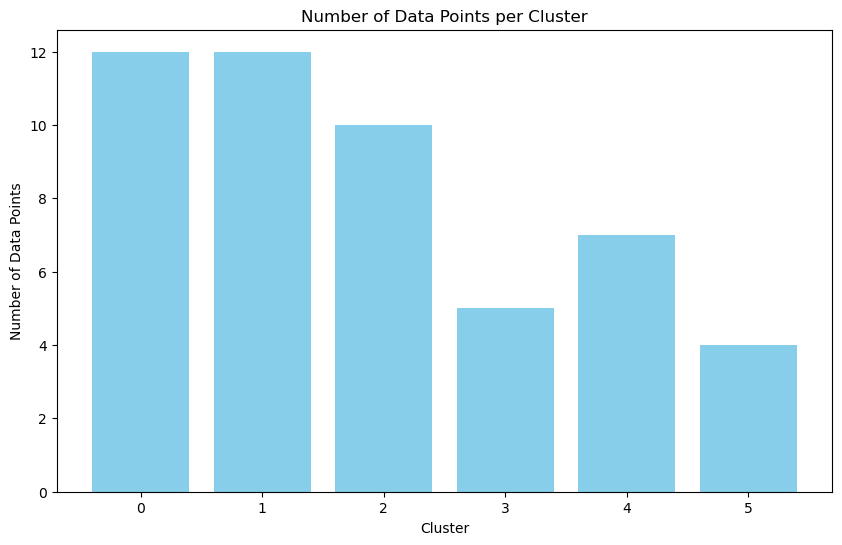

In [15]:
clusters = list(cluster_counts.keys())
counts = list(cluster_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Cluster')

# Highlight the cluster with the minimum number of points
# min_cluster, min_count = min(cluster_counts.items(), key=lambda item: item[1])
# plt.bar(min_cluster, min_count, color='orange')

plt.show()

In [16]:
average_ratings = new_york_df.groupby('cluster')['Rating'].mean()
print(average_ratings)

cluster
0    8.070000
1    7.933333
2    8.360000
3    8.271429
4    8.075000
5    7.900000
Name: Rating, dtype: float64


cluster
5    7.900000
1    7.933333
0    8.070000
Name: Rating, dtype: float64


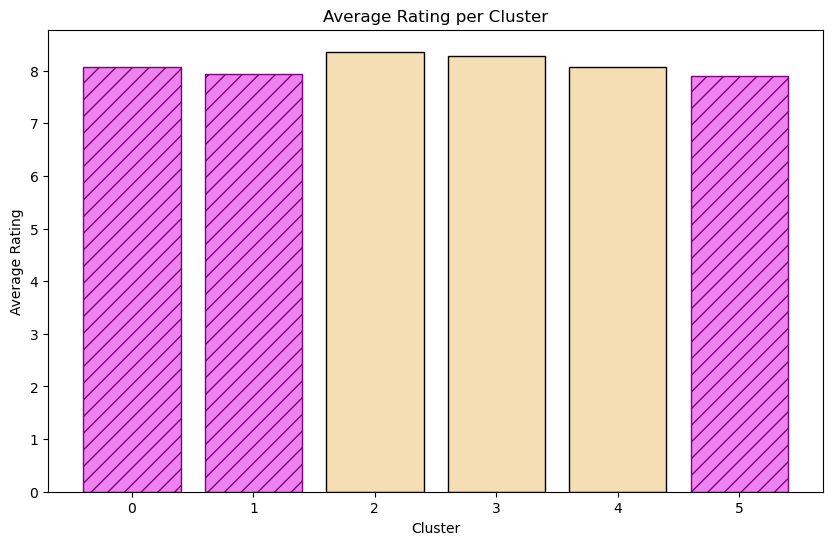

In [17]:
# Since cluster 5 has only 4 shops with low rating. It is the best place to open your shop 

sorted_avg_ratings = average_ratings.sort_values()

last_3_min_clusters = sorted_avg_ratings.head(3)
print(last_3_min_clusters)

clusters = average_ratings.index
avg_rating =  average_ratings.values

plt.figure(figsize=(10, 6))
bars = plt.bar(clusters, avg_rating, color='wheat', edgecolor='black')

for cluster in last_3_min_clusters.index:
    bars[cluster].set_color('violet')
    bars[cluster].set_hatch('//')
    bars[cluster].set_edgecolor('purple')

plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.title('Average Rating per Cluster')
plt.show()

In [18]:
specific_clusters = last_3_min_clusters.index
specific_values = last_3_min_clusters.values

filtered_cluster_counts = {c: cluster_counts[c] for c in specific_clusters}
min_cluster, min_count = min(filtered_cluster_counts.items(), key=lambda item: item[1])
print(f"Cluster with minimum points among {specific_clusters}: {min_cluster}, Count: {min_count}")


Cluster with minimum points among Int64Index([5, 1, 0], dtype='int64', name='cluster'): 5, Count: 4


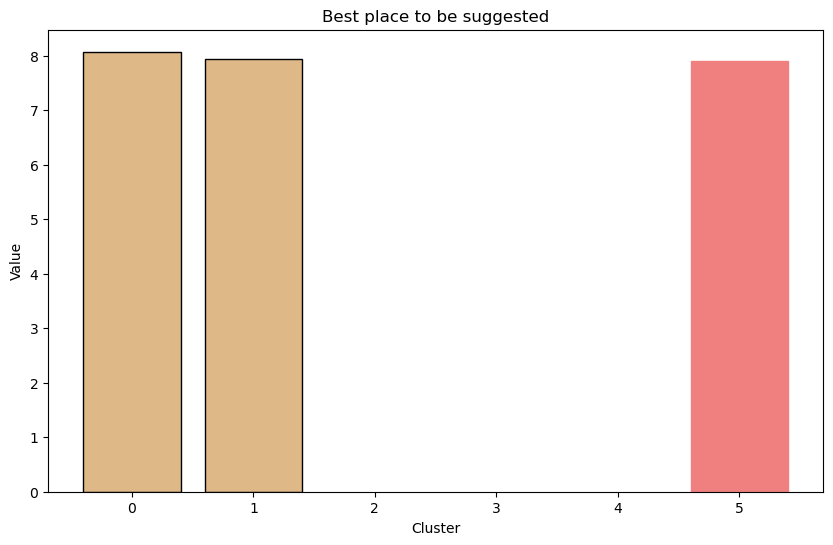

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar(specific_clusters, specific_values, color='burlywood', edgecolor='black')

for i, bar in enumerate(bars):
    if specific_clusters[i] == min_cluster:
        bar.set_color('lightcoral')  
        bar.set_hatch('//') 

plt.xlabel('Cluster')
plt.ylabel('Value')  
plt.title('Best place to be suggested')

plt.show()


In [ ]:
# Hence cluster 5 is the best place to open your shop for maximum profit